# Часть 2: Разведочный анализ данных (EDA)

Датасет содержит информацию о клиентах с указанием их дохода, возраста, суммы кредита и отношения кредита к доходу, а также бинарный таргет Default, указывающий на факт дефолта по кредиту (1 — дефолт, 0 — нет).

## Основные признаки:

Income — годовой доход клиента.
Age — возраст клиента.
Loan — сумма кредита, который был предоставлен клиенту.
Loan to Income — отношение суммы кредита к доходу клиента.
Default — бинарный таргет, указывающий, попал ли клиент в дефолт (1 = дефолт, 0 = нет).

## 1. Предварительный обзор данных:


---


Загрузим данные и отобразим несколько первых строк таблицы, чтобы понять структуру данных и типы признаков (например, Income, Loan, Age и бинарный таргет Default).

---



In [1]:
# Произведем импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитаем датасет
df = pd.read_csv('/content/Credit_Default.csv', delimiter= ',')
df.head()

,Income,Age,Loan,Loan to Income,Default
0,66155.92510,59.017015,8106.532131,0.122537,0
1,34415.15397,48.117153,6564.745018,0.190752,0
2,57317.17006,63.108049,8020.953296,0.139940,0
3,42709.53420,45.751972,6103.642260,0.142911,0
4,66952.68885,18.584336,8770.099235,0.130990,1


## 2. Анализ пропущенных значений:


---


Построим таблицы и графики, показывающие объем пропущенных значений в данных.
Используем pie chart или bar chart для визуализации процентного соотношения пропущенных значений по столбцам.

---



In [3]:
missing_values = df.isnull().sum()
missing_values

,0
Income,0
Age,0
Loan,0
Loan to Income,0
Default,0


In [4]:
# Процентное соотношение пропущенных значений ко всем значениям в датафрейме
missing_percentage = missing_values/ len(df) * 100
missing_percentage

,0
Income,0.0
Age,0.0
Loan,0.0
Loan to Income,0.0
Default,0.0


In [5]:
# Таблица с пропущенными значениями
missing_table = pd.DataFrame({'Column': df.columns,
                              'Missing_values': missing_values,
                              'Missing Percentage': missing_percentage}).reset_index(drop=True)
missing_table

,Column,Missing_values,Missing Percentage
0,Income,0,0.0
1,Age,0,0.0
2,Loan,0,0.0
3,Loan to Income,0,0.0
4,Default,0,0.0


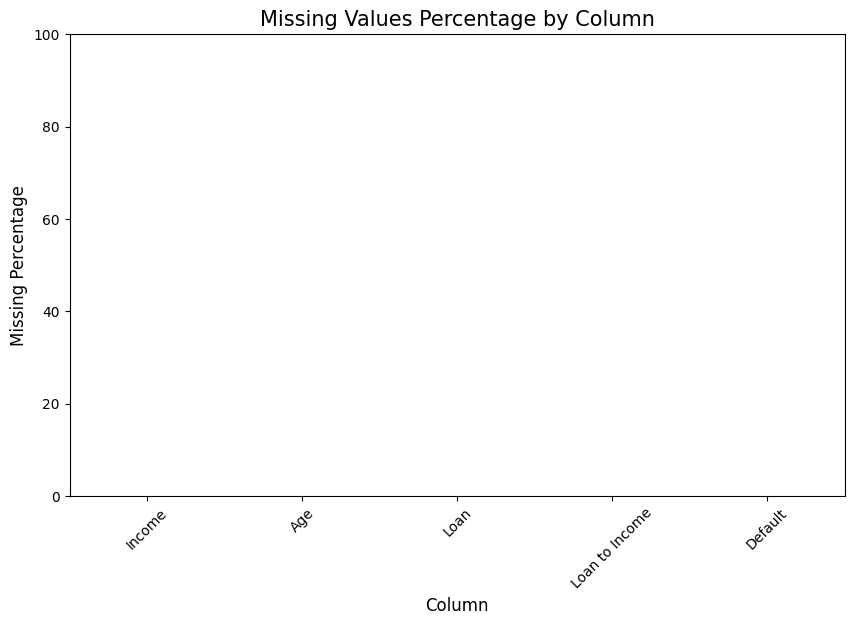

In [6]:
# Визуализация
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='lightblue')
plt.xlabel('Column', fontsize=12)
plt.ylabel('Missing Percentage', fontsize=12)
plt.title('Missing Values Percentage by Column', fontsize=15)
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.show()
plt.show()

### Вывод:


---


*В датасете нет пропущенных значений*:


---



## 3. Построение диаграмм попарного распределения признаков:


---

Построим диаграммы попарного распределения признаков, таких как доход (Income), возраст (Age), сумма кредита (Loan) и таргет Default, с использованием библиотеки seaborn или plotly.


---



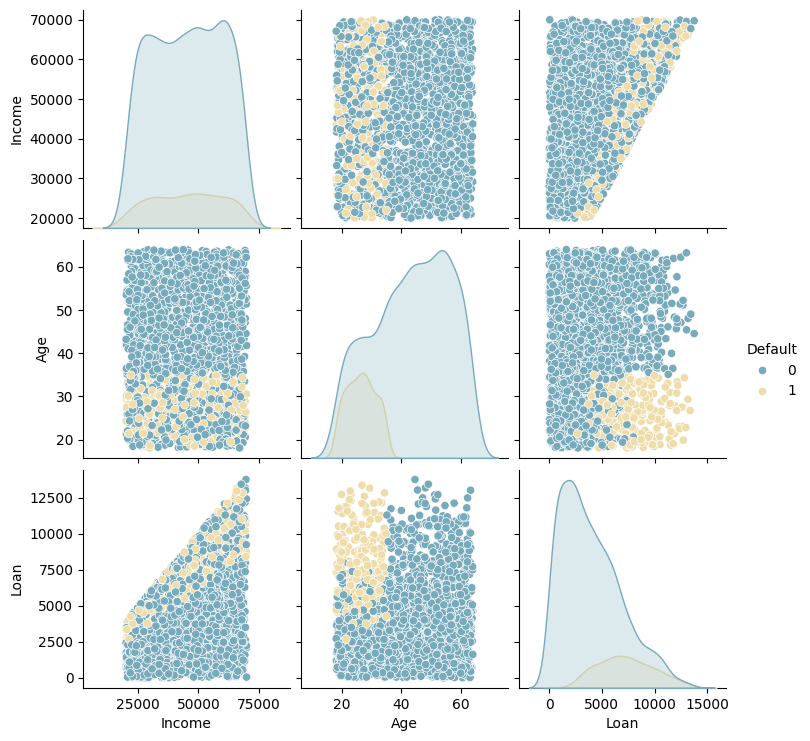

In [17]:
 # График попарного распределения признаков Income, Age, Loan и таргета Default.
features = ['Income', 'Age', 'Loan','Default']
df_filtered = df[features]
sns.pairplot(df_filtered, hue='Default',palette="blend:#7AB,#EDA")
plt.show()

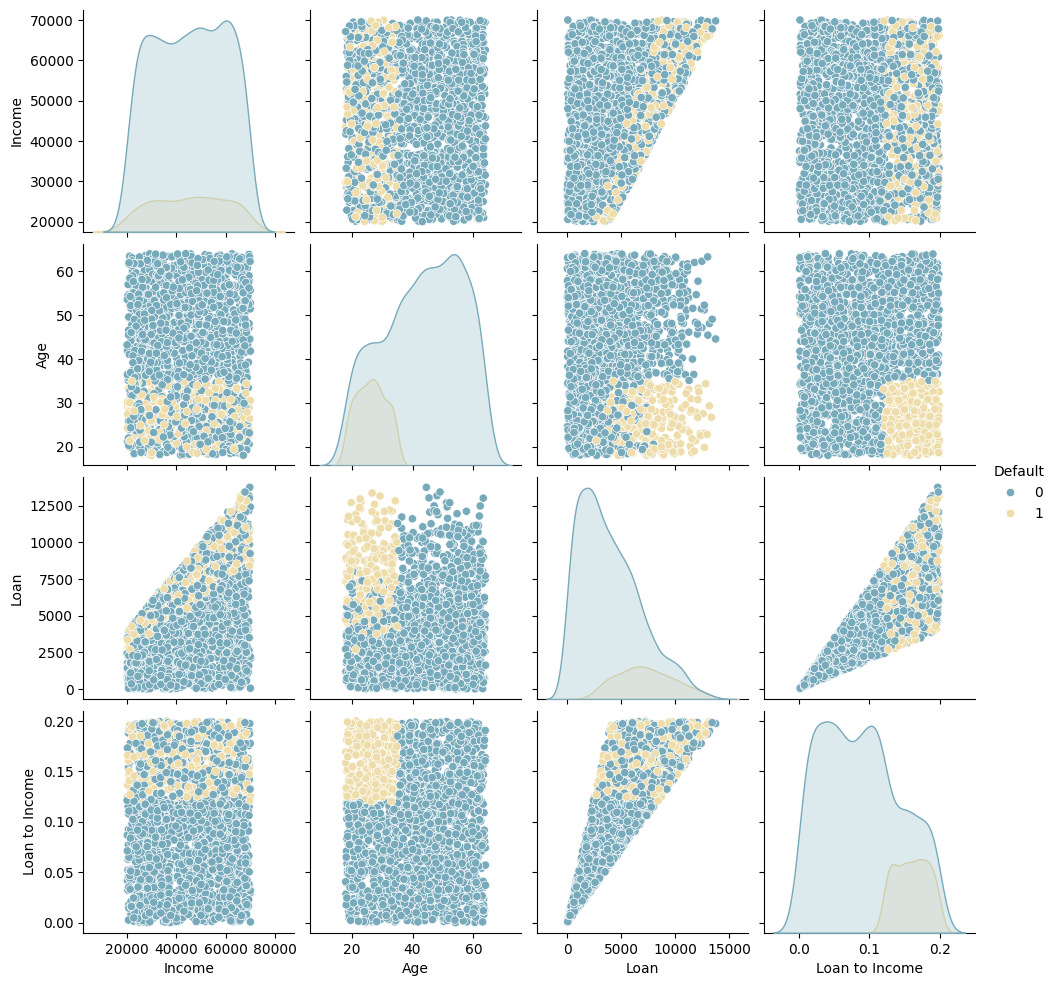

In [18]:
#  График попарного распределения признаков
sns.pairplot(df, hue='Default',palette="blend:#7AB,#EDA")
plt.show()



---


### *Анализ графиков попарного разделения признаков позволяет сделать вывод о наличии деления на классы. Подобные выводы, в свою очередь, позволят заключить, скажется ли положительно это разделение на обучение модели. Примечателен тот факт, что в каждом отдельном признаке наблюдается другая картина.*


---



## 4. Корреляционный анализ:


---

Рассчитаем матрицу корреляций для числовых признаков (например, Income, Loan, Loan to Income) и визуализируем ее с помощью heatmap.


---



In [23]:
# Матрица корреляции
corr_matrix = df.corr()
corr_matrix

,Income,Age,Loan,Loan to Income,Default
Income,1.000000,-0.034984,0.441117,-0.019862,0.002284
Age,-0.034984,1.000000,0.006561,0.021588,-0.444765
Loan,0.441117,0.006561,1.000000,0.847495,0.377160
Loan to Income,-0.019862,0.021588,0.847495,1.000000,0.433261
Default,0.002284,-0.444765,0.377160,0.433261,1.000000


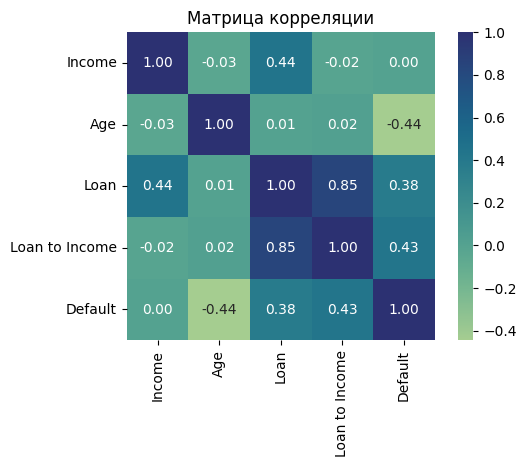

In [25]:
# Визуализация
plt.figure(figsize = (6,4))
sns.heatmap(corr_matrix,annot=True,cmap="crest", fmt='.2f',square=True)
plt.title('Матрица корреляции')
plt.show()

## Анализ матрицы корреляции позволяет сделать следующие выводы:

1. Наблюдается положительная корреляция между "Loan и Loan to Income" (0.85)
2. Наблюдаются несущественные значения корреляции "Default" с другими признаками. Это обстоятельство позволяет сделать вывод о сложности выявления факторов, вляющих на этот признак ("Default")
3. Наконец, наблюдается отрицательная корреляция между "Age" и "Default". Это обстоятельство позволяет сделать вывод о том, что при увеличении возраста, признак ("Default") менее вероятен


## 5. Анализ баланса классов:


---


Проанализируем баланс классов (дефолт/не дефолт) и визуализируем распределение классов с помощью bar chart.


---



In [26]:
classes = df['Default'].value_counts()
classes

,count
Default,
0,1717
1,283


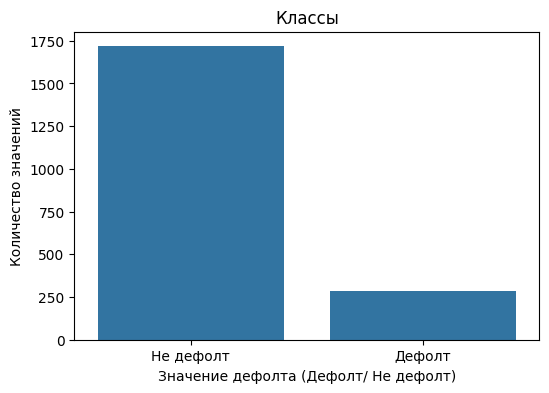

In [27]:
# Визуализация
plt.figure(figsize=(6,4))
sns.barplot(x= classes.index, y=classes.values)
plt.title('Классы')
plt.xlabel('Значение дефолта (Дефолт/ Не дефолт)')
plt.ylabel('Количество значений')
plt.xticks(ticks=[0,1], labels=['Не дефолт','Дефолт'])
plt.show()



---


*На графиках можно наблюдать большой дисбаланс. Класс "Не дефолт" значительно преобладает над классом "Дефолт". Необходимо применить метод баланса классов*

---



# Заключение



---
1. Пропуски в данных отсутствуют
2. Существует значительная зависимость между отношением суммы кредита к доходу клиента и самой суммой кредита. Признак "Loan to Income" с признаком "Loan".
3. Анализ графиков попарного разделения признаков позволяет сделать вывод о наличии деления на классы
4. Необходимо применить методы баланса классов


---

